# Import libraries


In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import os
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import RobustScaler

# Load the dataset


In [ ]:
data = pd.read_csv('CC GENERAL.csv')

# Exploratory Data Analysis


# Data Processing


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


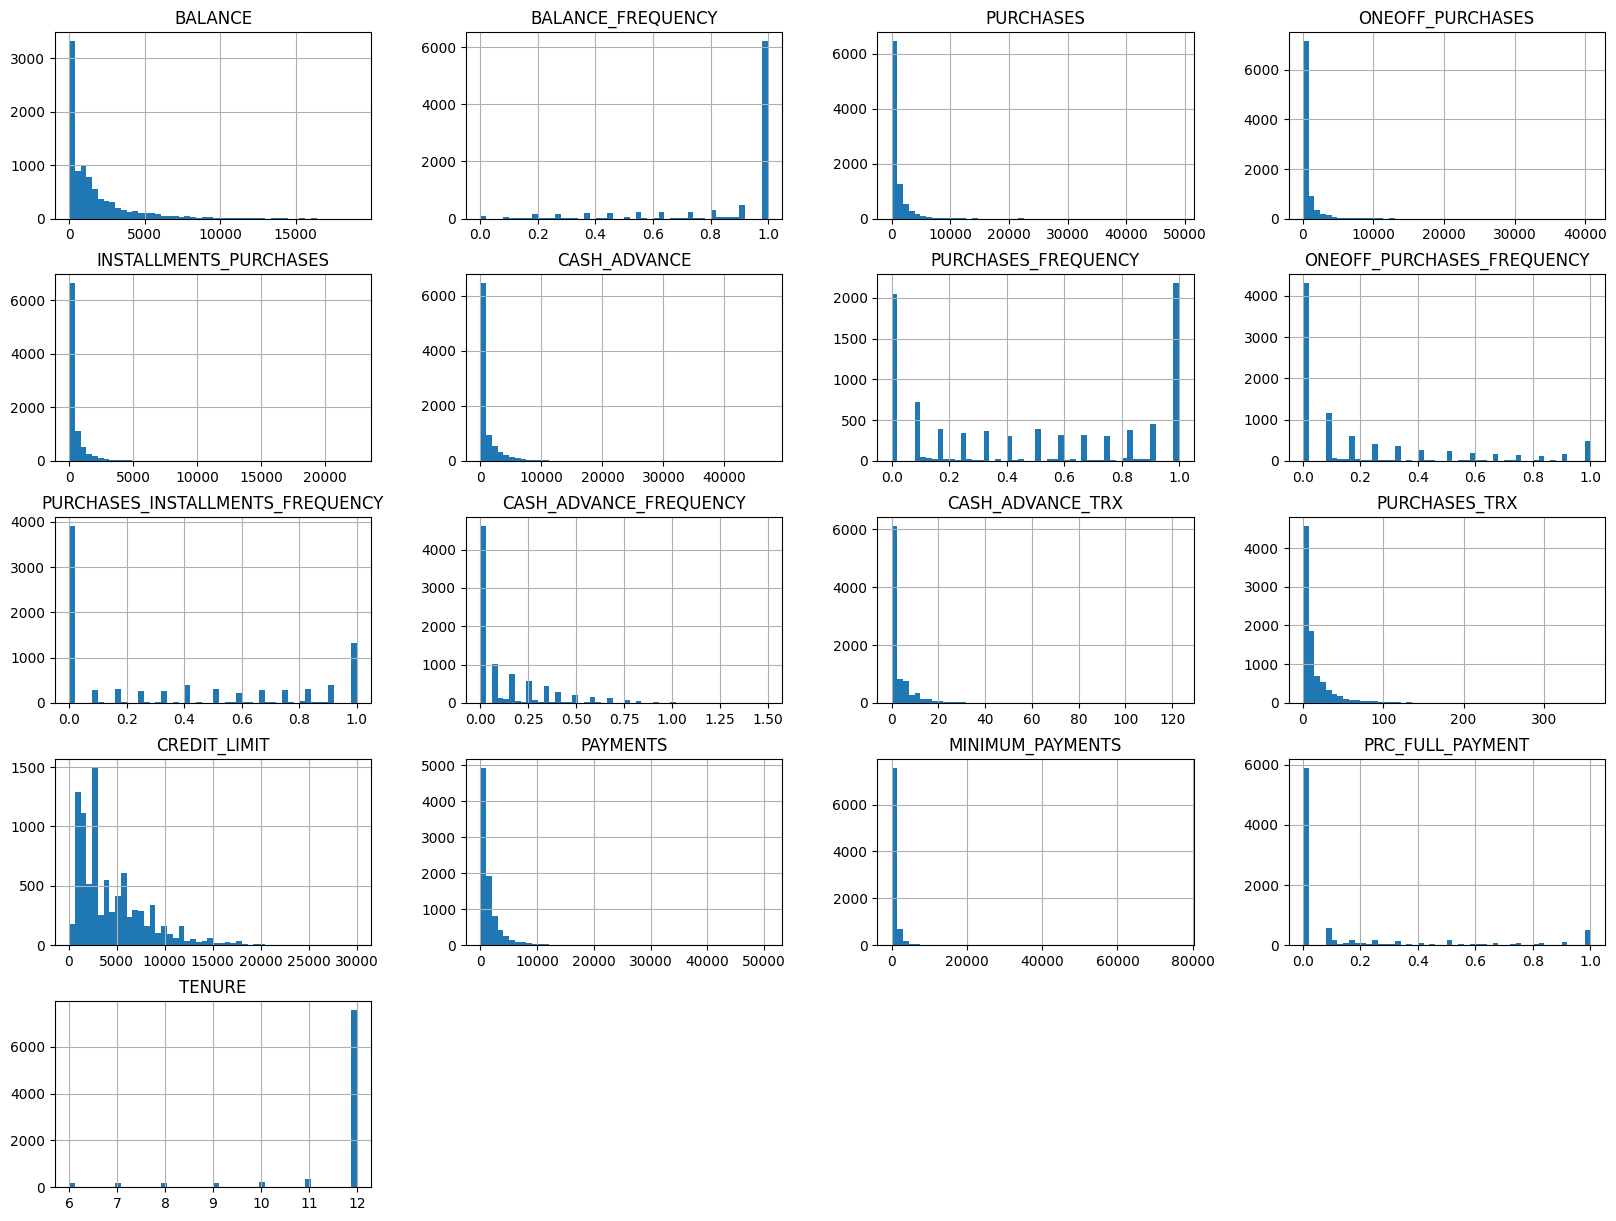

In [ ]:
data.hist(bins=50, figsize=(20,15))  # Visualización de la distribución de variables numéricas
plt.show()

Muchas de las variables, como BALANCE, PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS y MINIMUM_PAYMENTS, tienen distribuciones sesgadas a la derecha. Esto significa que la mayoría de los clientes tienen valores bajos en estas variables, pero hay algunos con valores muy altos. Ejemplos de lo que podemos inferir:


*   La mayoría de los clientes tienen un balance bajo.
*   Hay pocos clientes que hacen compras o avances en efectivo de montos muy elevados.
*   Pocos clientes tienen límites de crédito extremadamente altos.

Variables como BALANCE_FREQUENCY, PURCHASES_FREQUENCY, CASH_ADVANCE_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY y ONEOFF_PURCHASES_FREQUENCY parecen tener una tendencia a valores cercanos a 1. Esto sugiere que muchos clientes realizan transacciones con bastante frecuencia, probablemente en cada ciclo.

En particular, BALANCE_FREQUENCY y PURCHASES_FREQUENCY muestran una concentración fuerte en valores cercanos a 1, lo que podría implicar que la mayoría de los clientes revisan sus balances y realizan compras de manera regular.

La variable TENURE está altamente concentrada en los valores más altos, lo que podría significar que muchos clientes tienen una relación larga con la institución (aproximadamente 12 meses).

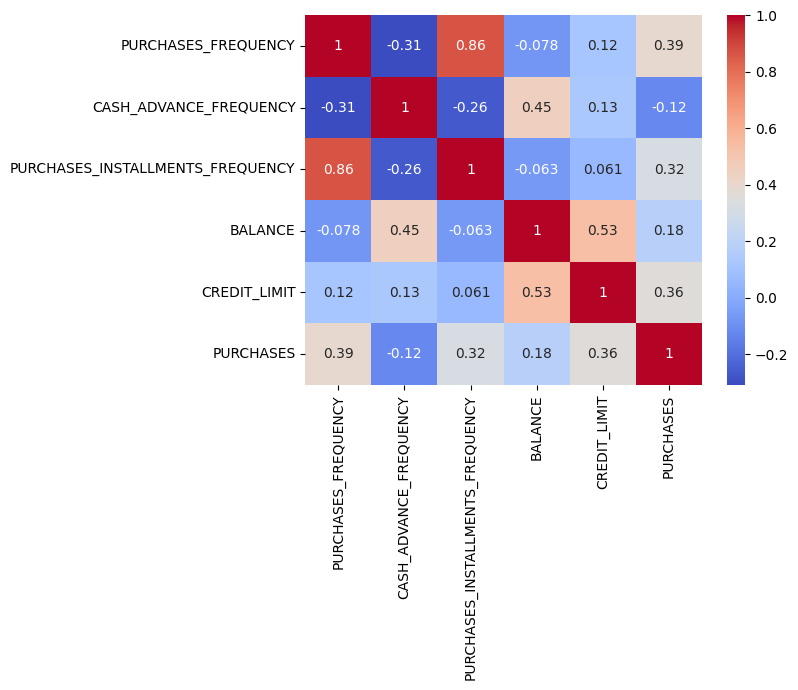

In [ ]:
# Correlación entre frecuencias y otras variables
frequencies = ['PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']
other_variables = ['BALANCE', 'CREDIT_LIMIT', 'PURCHASES']

correlation_matrix = data[frequencies + other_variables].corr()

# Visualizar la correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Data Cleaning


In [ ]:
data.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
# Se identifica que las variables con nulos es Float por lo que se rellena con un valor predeterminado
data2 = data.fillna(0)

In [ ]:
data2.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


## Feature Engineering
Se propone las 2 nuevas características:

*   Ratio de compras en efectivo a compras totales.
*   Promedio de compras por transacción.





In [ ]:
data2['CASH_TO_PURCHASE_RATIO'] = data2['CASH_ADVANCE'] / data2['PURCHASES']

In [ ]:
data2['AVG_PURCHASE_PER_TRX'] = data2['PURCHASES'] / data2['PURCHASES_TRX']

In [ ]:
data2.replace([float('inf'), -float('inf')], 0, inplace=True) # Reemplazar posibles infinitos generados por divisiones entre cero

In [ ]:
data2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CASH_TO_PURCHASE_RATIO,AVG_PURCHASE_PER_TRX
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0.000000,47.700000
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,NaN
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.000000,64.430833
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,0.137284,1499.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0.000000,16.000000


## Realizar codificación de features categóricos

CUST_ID es la unica variable categorica, pero lo mejor es eliminar esa columna en lugar de codificarla. Esto es porque la codificación de un identificador único no proporciona información adicional y puede incluso afectar negativamente el rendimiento de los modelos.

## Encoding


In [ ]:
data2.drop('CUST_ID', axis=1, inplace=True)

In [ ]:
#  Las variables BALANCE o PAYMENTS son más comprensibles con solo dos decimales, ya que la mayoría de las monedas utilizan ese formato.

## Scaling (if needed)


Dado que parece haber outliers en algunas de las columnas,  según los gráficos de distribuciones, puede ser mejor aplicar RobustScaler para reducir el impacto de esos valores extremos.

In [ ]:
columns_to_scale = ['BALANCE', 'PAYMENTS']

In [ ]:
scaler = RobustScaler()

In [ ]:
data2[columns_to_scale] = scaler.fit_transform(data2[columns_to_scale])

In [ ]:
print(data2.head())

    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.432267           0.818182      95.40              0.00   
1  1.209374           0.909091       0.00              0.00   
2  0.842099           1.000000     773.17            773.17   
3  0.411913           0.636364    1499.00           1499.00   
4 -0.028907           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000      

## # Train model/Tune hyperparameters

Explique el criterio utilizado

In [ ]:
# Método del Codo
sse = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_preprocessed)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_preprocessed, kmeans.labels_))

In [ ]:
# Gráfico del método del Codo
plt.figure(figsize=(10, 6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.show()

# Gráfico del Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes K')
plt.show()

In [ ]:
# Ejemplo DBSCAN

param_grid = {
    'eps': [0.1, 0.2, 0.3, 0.5, 0.7],  # Distancia de radio
    'min_samples': [3, 5, 10]  # Número mínimo de puntos para formar un cluster
}

# Variable para almacenar los mejores resultados
best_score = -1
best_params = {}

# Búsqueda manual (Grid Search)
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        # Definir el modelo con los parámetros actuales
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Ajustar el modelo
        labels = dbscan.fit_predict(df_preprocessed)

        # Verificar que haya clusters generados, ya que DBSCAN puede generar ruido (label -1)
        if len(set(labels)) > 1:  # Necesitamos al menos 2 clusters para calcular el Silhouette Score
            # Evaluar el modelo con Silhouette Score
            score = silhouette_score(df_preprocessed, labels)

            # Guardar si es el mejor score
            if score > best_score:
                best_score = score
                best_params = {
                    'eps': eps,
                    'min_samples': min_samples
                }

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores Parámetros: {best_params}")
print(f"Mejor Silhouette Score: {best_score:.4f}")


Mejores Parámetros: {'eps': 0.7, 'min_samples': 3}
Mejor Silhouette Score: 0.6978


In [ ]:
# best_model = KMeans(random_state=42,n_clusters=K)
# best_model = KMedoids(random_state=42,n_clusters=K)

# best_model = DBSCAN(**best_params)
# best_model = AgglomerativeClustering(**best_params)

In [ ]:
best_model.fit(df_preprocesssed)

# Visualization of clusters

In [ ]:
# Numerical variable distribution among clusters
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['VAR_NUM1', 'VAR_NUM2', 'VAR_NUM3']
for i in range(len(cols)):
    sns.boxplot(data=df, x='CLUSTER', y=cols[i], ax=axs[i])
fig.suptitle('Numerical Variable Distribution Among Clusters')
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

# Interpretation of clusters

In [ ]:
EJEMPLO

1. Cluster 0. Clientes con ingreso anual intermedio y score de gasto anual intermedio
2. Cluster 1. Clientes con bajo ingreso anual y alto score de gasto anual
3. Cluster 2. Clientes con alto ingreso anual y alto score de gasto anual
4. Cluster 3. Clientes con alto ingreso anual y bajo score de gasto anual